In [8]:
#libraries
import numpy as np
from pathlib import Path
from keras.preprocessing import image
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from matplotlib import pyplot as plt

In [2]:
#data preparation
!apt install unzip
!unzip training_data.zip

dog_path = Path("training_data") / "dogs"
not_dog_path = Path("training_data") / "not_dogs"
x_train = []
y_train = []

for img in dog_path.glob('*.png'):
  x_train.append(image.img_to_array(image.load_img(img)))
  y_train.append(1)

for img in not_dog_path.glob('*.png'):
  x_train.append(image.img_to_array(image.load_img(img)))
  y_train.append(0)

x_train = np.array(x_train)
y_train = np.array(y_train)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Archive:  training_data.zip
   creating: training_data/
   creating: training_data/dogs/
  inflating: training_data/dogs/00001.png  
  inflating: training_data/dogs/00005.png  
  inflating: training_data/dogs/00087.png  
  inflating: training_data/dogs/00120.png  
  inflating: training_data/dogs/00132.png  
  inflating: training_data/dogs/00148.png  
  inflating: training_data/dogs/00150.png  
  inflating: training_data/dogs/00153.png  
  inflating: training_data/dogs/00154.png  
  inflating: training_data/dogs/00155.png  
  inflating: training_data/dogs/00267.png  
  inflating: training_data/dogs/00287.png  
  inflating: training_data/dogs/00313.png  
  inflating: training_data/dogs/00316.png  
  inflating: training_data/dogs/00350.png  
  inflating: training_data/dogs/003

In [3]:
#pretrain with vgg16
#1: normalize data
#2: load a pretrained nerual network for feature extraction
x_train = vgg16.preprocess_input(x_train)
features_x = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3)).predict(x_train)

2/2 [==============================] - 4s 1s/step


In [4]:
#create model
model = Sequential()
model.add(Flatten(input_shape = features_x.shape[1:]))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))

In [7]:
#compile and train
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(features_x, y_train, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
2/2 [==============================] - 1s 14ms/step - loss: 1.3692e-20 - accuracy: 1.0000
Epoch 2/5
2/2 [==============================] - 0s 13ms/step - loss: 3.8016e-21 - accuracy: 1.0000
Epoch 3/5
2/2 [==============================] - 0s 13ms/step - loss: 2.4511e-21 - accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 0s 13ms/step - loss: 2.0470e-22 - accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 0s 19ms/step - loss: 1.8865e-23 - accuracy: 1.0000


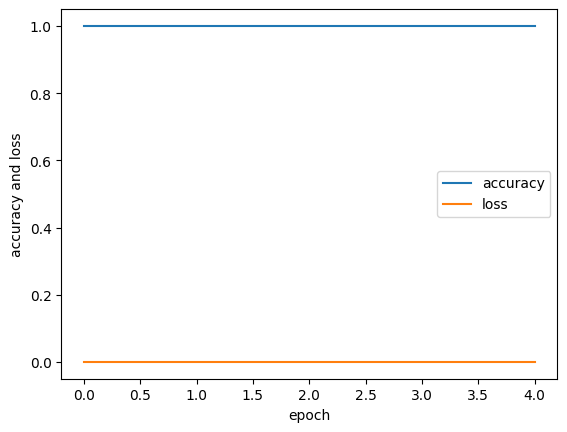

In [9]:
#plot result of train
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc ='right')
plt.show()

1/1 [==============================] - 0s 22ms/step




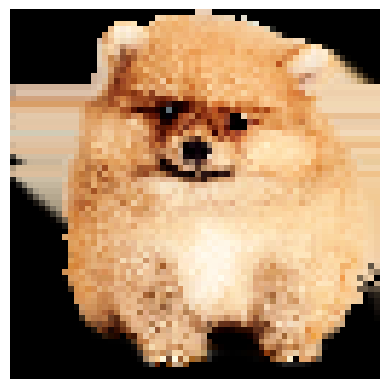

the pridiction is a dog with 100.0%


In [16]:
#predict a new image of dog
dog_img = np.expand_dims(image.img_to_array(image.load_img('dog.png', target_size = (64, 64))), axis = 0)
dog_img = vgg16.preprocess_input(dog_img)

dog_features = vgg16.VGG16(weights = 'imagenet', include_top = False, input_shape = (64, 64, 3)).predict(dog_img)
img_type = model.predict(dog_features)

#show result of prediction
print('\n')
plt.imshow(image.load_img('dog.png', target_size = (64, 64)))
plt.axis('off')
plt.show()

print('The pridiction is a dog with {}%'.format(img_type[0][0]*100))